# Multiple Linear Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [107]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [40]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [31]:
dataset['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [32]:
dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [38]:
dataset.groupby('State').nunique()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,16,17,17,17
Florida,16,16,16,16
New York,17,17,16,17


<AxesSubplot:>

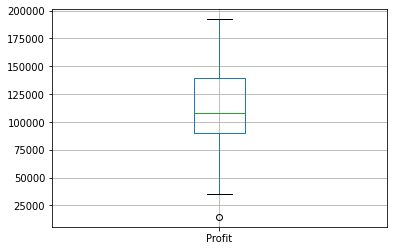

In [5]:
dataset.boxplot('Profit')

<AxesSubplot:title={'center':'Profit'}, xlabel='State'>

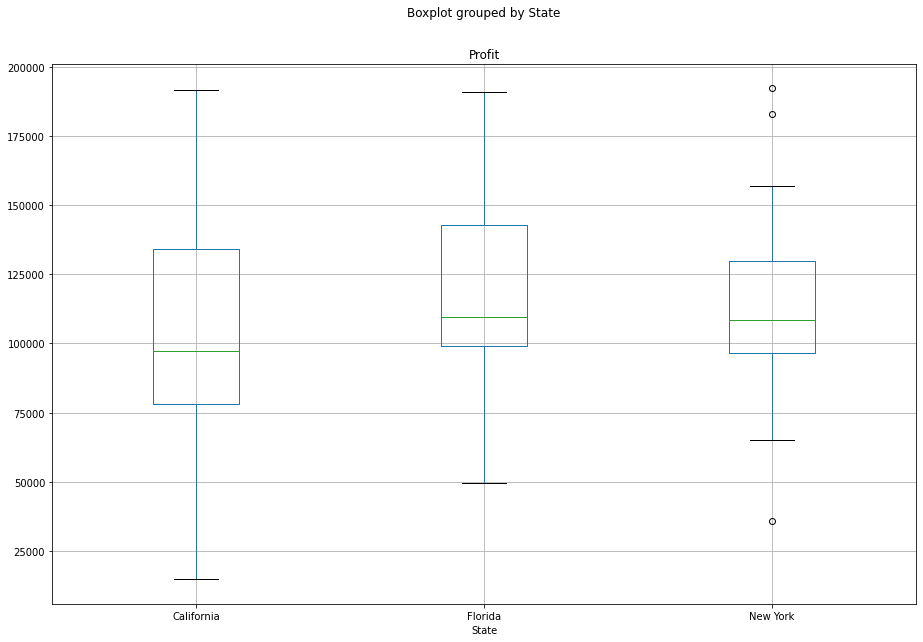

In [17]:
dataset.boxplot(column=['Profit'],by='State',figsize=(15,10))

In [4]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

## Encoding categorical data

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [27]:
print(X)

[[0.0 1.0 0.0 0.0 165349.2 136897.8 471784.1]
 [1.0 0.0 1.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 0.0 1.0 153441.51 101145.55 407934.54]
 [0.0 1.0 0.0 0.0 144372.41 118671.85 383199.62]
 [1.0 0.0 0.0 1.0 142107.34 91391.77 366168.42]
 [0.0 1.0 0.0 0.0 131876.9 99814.71 362861.36]
 [1.0 0.0 1.0 0.0 134615.46 147198.87 127716.82]
 [1.0 0.0 0.0 1.0 130298.13 145530.06 323876.68]
 [0.0 1.0 0.0 0.0 120542.52 148718.95 311613.29]
 [1.0 0.0 1.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 0.0 1.0 101913.08 110594.11 229160.95]
 [1.0 0.0 1.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 0.0 1.0 93863.75 127320.38 249839.44]
 [1.0 0.0 1.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 0.0 1.0 119943.24 156547.42 256512.92]
 [0.0 1.0 0.0 0.0 114523.61 122616.84 261776.23]
 [1.0 0.0 1.0 0.0 78013.11 121597.55 264346.06]
 [0.0 1.0 0.0 0.0 94657.16 145077.58 282574.31]
 [1.0 0.0 0.0 1.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 0.0 86419.7 153514.11 0.0]
 [1.0 0.0 1.0 0.0 76253.86 113867.3 29866

## Splitting the dataset into the Training set and Test set

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# random state = 0  u otro cualquier valor entero, el resultado será el mismo en todas las ejecuciones posibles

## Training the Multiple Linear Regression model on the Training set

In [32]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [56]:
m1,m2,m3,m4,m5,m6 = modelo.coef_ # coeficiente - pendiente
b = modelo.intercept_ # coeficiente - intercepto
print(f"\n m1 es : {m1} \n m2 es : {m2} \n m3 es : {m3} \n m4 es : {m4} \n m5 es : {m5} \n m6 es : {m6} \n b es : {b} ") 


 m1 es : 86.638369172066 
 m2 es : -872.6457908788707 
 m3 es : 786.0074217006356 
 m4 es : 0.7734671927327748 
 m5 es : 0.03288459753634626 
 m6 es : 0.03661002586392014 
 b es : 42467.52924853325 


In [57]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_train , modelo.predict(X_train)) ** 0.5
RMSE # raiz del error cuadrático medio

9031.666612578969

## Predicting the Test set results

In [33]:
y_pred = modelo.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


# USANDO RECURSOS DEL CURSO DE MACHINE LEARNING DE ANDREW NG

In [140]:
# carga de dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# random state = 0  u otro cualquier valor entero, el resultado será el mismo en todas las ejecuciones posibles

In [125]:
# Cantidad de registros en el conjunto de entrenamiento según el estado
unique, counts = np.unique(X_train[:,-1], return_counts=True)
result = np.column_stack((unique, counts)) 
print (result)

[['California' 16]
 ['Florida' 10]
 ['New York' 14]]


In [141]:
# Transformación de la variable categórica 'Estate'
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# random state = 0  u otro cualquier valor entero, el resultado será el mismo en todas las ejecuciones posibles

In [147]:
# Cantidad de regitros en el X_train del estado de California
unique, counts = np.unique(X_train[:,0], return_counts=True)
result = np.column_stack((unique, counts)) 
print (result) 

[[0.0 24]
 [1.0 16]]


In [148]:
# Cantidad de regitros en el X_train del estado de Florida
unique, counts = np.unique(X_train[:,1], return_counts=True)
result = np.column_stack((unique, counts)) 
print (result) 

[[0.0 30]
 [1.0 10]]


In [149]:
# Cantidad de regitros en el X_train del estado de New York
unique, counts = np.unique(X_train[:,2], return_counts=True)
result = np.column_stack((unique, counts)) 
print (result) 
# Se comprueba que hace la misma cantidad de partición con y sin transformar de la variable categorica: 'State'

[[0.0 26]
 [1.0 14]]


In [ ]:
X_features = ['California','Florida','New York','R&D Spend', 'Administration', 'Marketing Spend']

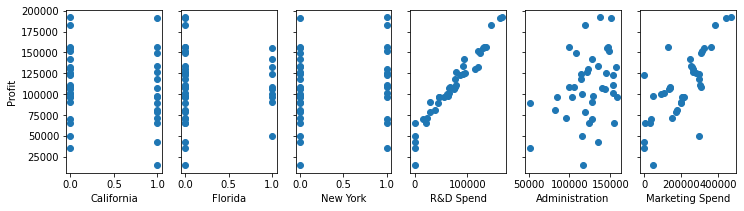

In [198]:
fig,ax=plt.subplots(1, 6, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Profit")
plt.show()
# graficando podemos observar que variables tienes mayor influencia de la variable dependiente

In [197]:
X_train[:,-1].dtype

dtype('O')

In [201]:
x = np.arange(0, 20, 1)

In [204]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [202]:
x.shape

(20,)

In [203]:
X = x.reshape(-1, 1)

In [205]:
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

In [206]:
X.shape

(20, 1)

In [207]:
np.c_[x, x**2, x**3]

array([[   0,    0,    0],
       [   1,    1,    1],
       [   2,    4,    8],
       [   3,    9,   27],
       [   4,   16,   64],
       [   5,   25,  125],
       [   6,   36,  216],
       [   7,   49,  343],
       [   8,   64,  512],
       [   9,   81,  729],
       [  10,  100, 1000],
       [  11,  121, 1331],
       [  12,  144, 1728],
       [  13,  169, 2197],
       [  14,  196, 2744],
       [  15,  225, 3375],
       [  16,  256, 4096],
       [  17,  289, 4913],
       [  18,  324, 5832],
       [  19,  361, 6859]])

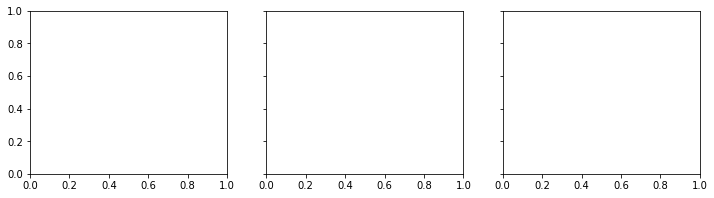

In [213]:
fig, ax =plt.subplots(1, 3, figsize=(12, 3), sharey=True)

In [215]:
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]
